In [1]:
import tensorflow as tf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = "/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray"

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

In [5]:
train_normal = os.path.join(train_dir ,'NORMAL')
train_pneu   = os.path.join(train_dir ,'PNEUMONIA')
validation_normal = os.path.join(validation_dir , 'NORMAL')
validation_pnem = os.path.join(validation_dir , 'PNEUMONIA')
test_normal = os.path.join(test_dir ,'NORMAL')
test_pnem   = os.path.join(test_dir ,'PNEUMONIA')

In [6]:
num_normal_tr = len(os.listdir(train_normal))
num_pnem_tr = len(os.listdir(train_pneu))

num_normal_val = len(os.listdir(validation_normal))
num_pnem_val = len(os.listdir(validation_pnem))

num_normal_test = len(os.listdir(test_normal))
num_pnem_test = len(os.listdir(test_pnem))

total_train = num_normal_tr + num_pnem_tr
total_val = num_normal_val + num_pnem_val
total_test = num_normal_test + num_pnem_test

print('total training normal images:', num_normal_tr)
print('total training pnemonia images:', num_pnem_tr)

print('total validation normal images:', num_normal_val)
print('total validation pnemonia images:', num_pnem_val)

print('total test normal images:', num_normal_test)
print('total test pnemonia images:', num_pnem_test)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("Total test images:", total_test)

total training normal images: 1342
total training pnemonia images: 3876
total validation normal images: 9
total validation pnemonia images: 9
total test normal images: 234
total test pnemonia images: 390
--
Total training images: 5218
Total validation images: 18
Total test images: 624


In [7]:
list_train_normal_ds = tf.data.Dataset.list_files(str(train_dir + '*/NORMAL/*.jpeg'))
list_train_pneu_ds = tf.data.Dataset.list_files(str(train_dir + '*/PNEUMONIA/*.jpeg'))
list_val_normal_ds = tf.data.Dataset.list_files(str(validation_dir + '*/NORMAL/*.jpeg'))
list_val_pneu_ds = tf.data.Dataset.list_files(str(validation_dir + '*/PNEUMONIA/*.jpeg'))

In [8]:
list_combined_normal = list_train_normal_ds.concatenate(list_val_normal_ds)
list_combined_pnem = list_train_pneu_ds.concatenate(list_val_pneu_ds)

In [9]:
total_val_train_combined_normal = len(list(list_combined_normal.as_numpy_iterator()))
total_val_train_combined_pnem = len(list(list_combined_pnem.as_numpy_iterator()))
print("Total normal images after combining train and validation:",total_val_train_combined_normal)
print("Total pneumonia images after combining train and validation:",total_val_train_combined_pnem)

Total normal images after combining train and validation: 1349
Total pneumonia images after combining train and validation: 3883


In [10]:
val_normal_size = int(0.15 * total_val_train_combined_normal)
val_pnem_size = int(0.10 * total_val_train_combined_pnem)

list_combined_normal_ds = list_combined_normal.shuffle(1000)
list_combined_normal = list(list_combined_normal_ds.as_numpy_iterator())

list_val_normal = list_combined_normal[:val_normal_size]
list_train_normal = list_combined_normal[val_normal_size:]

list_val_normal_dataset = tf.data.Dataset.from_tensor_slices(list_val_normal)
list_train_normal_dataset = tf.data.Dataset.from_tensor_slices(list_train_normal)

In [11]:
list_combined_pnem_ds = list_combined_pnem.shuffle(4000)
list_combined_pnem = list(list_combined_pnem_ds.as_numpy_iterator())

list_val_pnem = list_combined_pnem[:val_pnem_size]
list_train_pnem = list_combined_pnem[val_pnem_size:]

list_val_pnem_dataset = tf.data.Dataset.from_tensor_slices(list_val_pnem)
list_train_pnem_dataset = tf.data.Dataset.from_tensor_slices(list_train_pnem)

In [12]:
list_val_ds = list_val_normal_dataset.concatenate(list_val_pnem_dataset).shuffle(500)
list_train_ds = list_train_normal_dataset.concatenate(list_train_pnem_dataset).shuffle(4600)
list_test_ds = tf.data.Dataset.list_files(str(test_dir + '*/*/*'), shuffle=False)

In [13]:
total_train = len(list(list_train_ds.as_numpy_iterator()))
total_val = len(list(list_val_ds.as_numpy_iterator()))
print("Total train after split:",total_train)
print("Total validation after split:", total_val)
print("Total test:", len(list(list_test_ds.as_numpy_iterator())))

Total train after split: 4642
Total validation after split: 590
Total test: 624


In [14]:
for f in list_train_ds.take(5):
  print(f.numpy())

b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person312_bacteria_1454.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person448_bacteria_1934.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person626_bacteria_2502.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person1523_bacteria_3979.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person1176_bacteria_3124.jpeg'


In [15]:
for f in list_val_ds.take(5):
  print(f.numpy())

b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person881_bacteria_2805.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person1661_bacteria_4406.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person367_bacteria_1665.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/PNEUMONIA/person1224_virus_2074.jpeg'
b'/Users/mzc02-dcpark/Downloads/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0687-0001.jpeg'


In [16]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [17]:
def get_label(file_path):  
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  #The second to last is the class-directory
  if (parts[-2] == 'PNEUMONIA'):
    class_label = 1
  else:
    class_label = 0
  return class_label

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [18]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_train_ds = list_train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_val_ds = list_val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
labeled_test_ds = list_test_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [19]:
for image, label in labeled_train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  1


In [20]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=4000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)#, reshuffle_each_iteration = True)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [21]:
train_ds = prepare_for_training(labeled_train_ds)
image_batch, label_batch = next(iter(train_ds))

In [22]:
image_batch.numpy().shape

(32, 224, 224, 3)

In [23]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(label_batch[n].numpy())
      plt.axis('off')

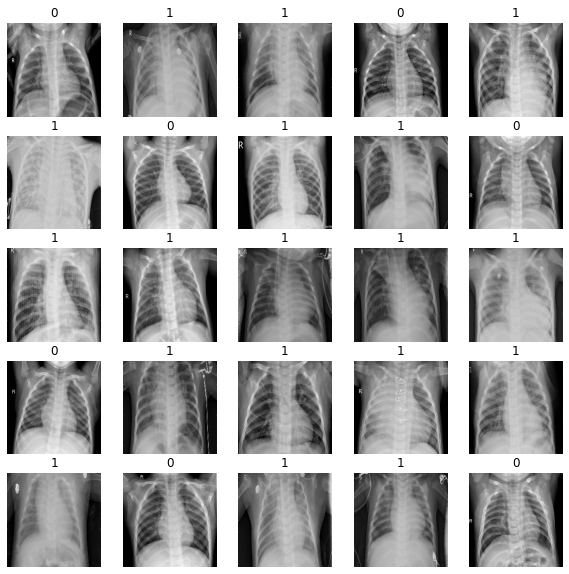

In [24]:
show_batch(image_batch, label_batch)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [32]:
initial_epochs = 15
validation_steps=total_val // BATCH_SIZE

In [33]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    steps_per_epoch=total_train // BATCH_SIZE,
                    validation_data=labeled_val_ds.batch(32),
                    validation_steps=total_val // BATCH_SIZE)

Epoch 1/15
145/145 [==============================] - 84s 578ms/step - loss: 0.3421 - accuracy: 0.8485 - val_loss: 0.1631 - val_accuracy: 0.9479
Epoch 2/15
145/145 [==============================] - 84s 576ms/step - loss: 0.1021 - accuracy: 0.9634 - val_loss: 0.1444 - val_accuracy: 0.9531
Epoch 3/15
145/145 [==============================] - 77s 534ms/step - loss: 0.0683 - accuracy: 0.9744 - val_loss: 0.1182 - val_accuracy: 0.9670
Epoch 4/15
145/145 [==============================] - 78s 535ms/step - loss: 0.0596 - accuracy: 0.9728 - val_loss: 0.1299 - val_accuracy: 0.9653
Epoch 5/15
145/145 [==============================] - 77s 529ms/step - loss: 0.0303 - accuracy: 0.9866 - val_loss: 0.1581 - val_accuracy: 0.9670
Epoch 6/15
145/145 [==============================] - 77s 531ms/step - loss: 0.0261 - accuracy: 0.9905 - val_loss: 0.0873 - val_accuracy: 0.9792
Epoch 7/15
145/145 [==============================] - 80s 548ms/step - loss: 0.0093 - accuracy: 0.9963 - val_loss: 0.1552 - val_ac

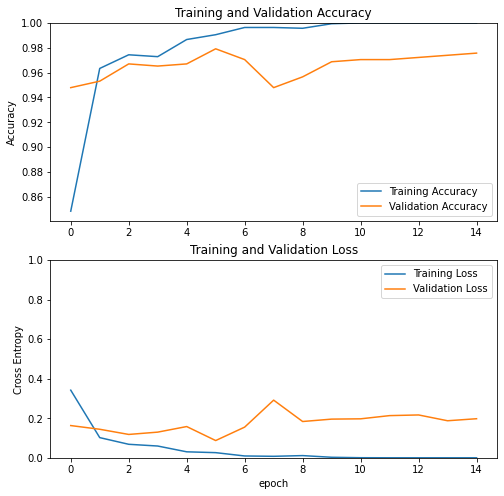

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
model.evaluate(labeled_test_ds.batch(32))

20/20 [==============================] - 4s 224ms/step - loss: 4.4874 - accuracy: 0.7308


[4.487407207489014, 0.7307692170143127]